### Visualize random samples

Don't forget to update all paths

In [2]:
import json, random, time, os, base64
import numpy as np
from pprint import pprint
from collections import Counter, defaultdict
import cv2
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [3]:
#dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_train_val.json", "r"))
dataset = json.load(open("/home/yingshac/CYS/WebQnA/WebQnA_data_new/WebQA_0904_concat_newimgid_newguid.json", "r"))
print(Counter([dataset[k]['split'] for k in dataset]))
print(len(set([dataset[k]['Guid'] for k in dataset])))
print(Counter([dataset[k]['Qcate'] for k in dataset]))


Counter({'train': 36766, 'test': 7540, 'val': 4966})
49272
Counter({'text': 24343, 'YesNo': 8255, 'Others': 6470, 'choose': 5201, 'number': 2318, 'color': 2058, 'shape': 627})


In [4]:
with open("/data/yingshac/MMMHQA/base64_0904/imgs.lineidx", "r") as fp_lineidx:
    lineidx = [int(i.strip()) for i in fp_lineidx.readlines()]
print(len(lineidx))

389750


In [5]:
### Txt-based queries
show_distractors = False

while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] == 'text': break

print(k)
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for f in dataset[k]['txt_posFacts']:
    print(f['fact'])
    print(f['url'])

if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])

d5dabca00dba11ecb1e81171463288e9
Q =  The proton donors are what type of substance that is the same as where it increases the concentration of hydronium ions when added to water?

A =
['An acid.']

------ Positive Evidence ------ 
Thus, an Arrhenius acid can also be described as a substance that increases the concentration of hydronium ions when added to water. Examples include molecular substances such as hydrogen chloride and acetic acid. An Arrhenius base, on the other hand, is a substance which increases the concentration of hydroxide (OH −) ions when dissolved in water.
https://en.wikipedia.org/wiki/Acid
The first category of acids are the proton donors, or Brønsted–Lowry acids. In the special case of aqueous solutions, proton donors form the hydronium ion H 3 O + and are known as Arrhenius acids. Brønsted and Lowry generalized the Arrhenius theory to include non-aqueous solvents.
https://en.wikipedia.org/wiki/Acid_(chemistry)


d5c391420dba11ecb1e81171463288e9
Q =  "Do any shrubs or plants grow tall enough to reach the second story windows at the Roosevelt Campobello cottage?"

A =
['"No shrubs or plants grow tall enough to reach that far."',
 '"No, all of the surrounding shrubs and plants are not tall enough to reach '
 'the second story windows of the Roosevelt Campobello cottage."',
 '"No, the shrubs or plants near the Roosevelt Campobello cottage do not grow '
 'tall enough to reach the second story windows"',
 '"At the Roosevelt Campobello cottage, there are no plants or shrubs that '
 'grow tall enough to reach the second story windows."',
 '"No, no shrubs or plants grow tall enough."',
 '"No, no shrubs or plants grow tall enough to reach the second story windows '
 'at the Roosevelt Campobello cottage."']

------ Positive Evidence ------ 
30109234 30109234
https://commons.wikimedia.org/wiki/File:Roosevelt-Cottage-Campobello-2011.jpg
Caption =  Roosevelt-Cottage-Campobello-2011
30009470 30009470
https:/

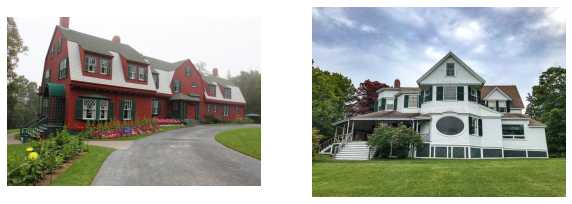

In [9]:
### Image-based queries
show_distractors = False
Qcate = ['color', 'shape', 'number', 'choose', 'YesNo', 'Others']


while True:
    k = random.choice(list(dataset.keys()))
    if dataset[k]['Qcate'] in Qcate and dataset[k]['split'] == 'test':
        break
print(k)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
print("Q = ", dataset[k]['Q'])
print("\nA =")
pprint(dataset[k]['A'])
print("\n------ Positive Evidence ------ ")
for ax, f in zip(axes.ravel(), dataset[k]['img_posFacts']):
    image_id = f['image_id']
    with open("/data/yingshac/MMMHQA/base64_0904/imgs.tsv", "r") as fp:
        fp.seek(lineidx[int(image_id)%10000000])
        imgid, img_base64 = fp.readline().strip().split('\t')
    print(image_id, imgid) # image_id in dataset file and image_id in img file should agree
    im = cv2.imdecode(np.frombuffer(base64.b64decode(img_base64), dtype=np.uint8), cv2.IMREAD_COLOR)
    ax.imshow(im[:,:,::-1])
    ax.axis('off')
    print(f['url'])
    print("Caption = ", f['caption'])
axes.ravel()[-1].axis('off') # hide the second plot if there is only one positive img
if show_distractors:
    print("\n------ Negative Evidence ------ ")
    for f in dataset[k]['img_negFacts']:
        print(f['caption'])
        print(f['imgUrl'])
    for f in dataset[k]['txt_negFacts']:
        print(f['fact'])